# Weibull Distribution

Dustin D. Gerrard
<br>
September 2018

This notebook describes the Weibull distribution. 
<br>
<br>
https://en.wikipedia.org/wiki/Weibull_distribution
<br>
<br>
Examples:
* Failure of parts over time (reliability analysis).
* Wind power.
* The size of particles (crushed rock, colloids, etc.)

Characteristics:
* The Weibull c.d.f. is a straight line in a log-log plot.

<h2><center><u> Weibull p.d.f.</u></center></h2>

\begin{equation*}
\Large
f(x; k, \lambda) = \frac{k}{\lambda}\left (  \frac{x}{\lambda} \right )^{(k-1)}e^{-(x/\lambda)^k}
\end{equation*}

<h2><center><u> Weibull c.d.f.</u></center></h2>

\begin{equation*}
\Large
F(x; k, \lambda) = 1 - e^{-(x/\lambda)^k}
\end{equation*}

In [3]:
from IPython.core.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/5/58/Weibull_PDF.svg', width=480, height=5480) 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib
from scipy.special import erf, erfinv, gamma, gammainc

# Weibull Distribution using scipy

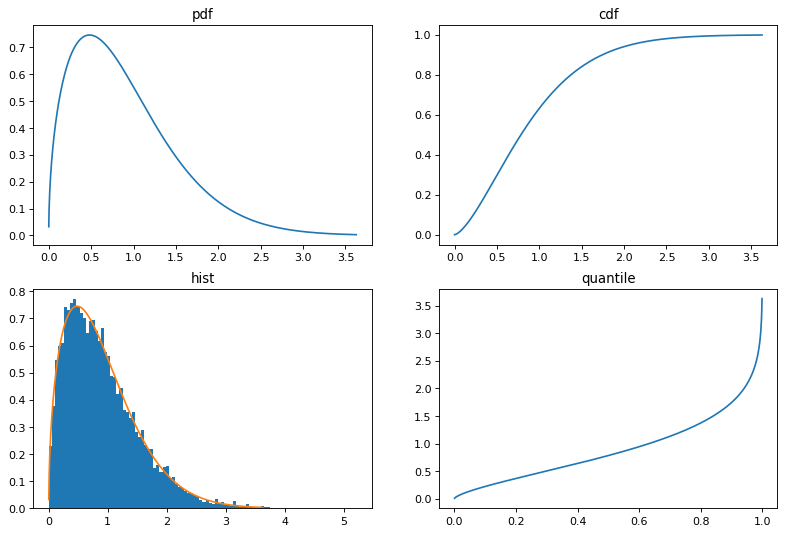

In [24]:
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.exponweib.html#scipy.stats.exponweib
k = 1.5
lambda0 = 1
x = np.linspace(exponweib.ppf(0.00001, 1, k, scale=lambda0), exponweib.ppf(0.999, 1, k, scale=lambda0), 1000) # ppf = percent point function
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(x, exponweib.pdf(x,1,k, scale=lambda0)) # pdf = probability distribution function
plt.title('pdf')
plt.subplot(222)
plt.plot(x, exponweib.cdf(x,1,k, scale=lambda0)) # cdf = cumumlative distribution function
plt.title('cdf')
plt.subplot(223)
r = exponweib.rvs(1,k,scale=lambda0, size=10000) # rvs = random variates
plt.hist(r, 100, density=True)
plt.plot(x, exponweib.pdf(x,1,k,scale=lambda0))
plt.title('hist')
r = exponweib.rvs(1,k,scale=lambda0, size=100000)
plt.subplot(224)
q = np.linspace(0.001, 0.999, 1000)
plt.plot(q, exponweib.ppf(q,1,k,scale=lambda0))
plt.title('quantile')
plt.show()

In [25]:
mean, var, skew, kurt = exponweib.stats(k,1,moments='mvsk')
median = exponweib.median(k,1,loc=0, scale=1)

# Weibull Distribution explicitly in Python

In [5]:
def weibullDist(k):
    Xs = np.linspace(0, 10+k/10, 1001)
    Ys = 1/(pow(2,k/2-1)*gamma(k/2))*pow(Xs,k-1)*np.exp(-pow(Xs,2)/2)
    CDFs = gammainc(k/2, pow(Xs,2)/2)
    return Xs, Ys, CDFs

### pdf - probability distribution function

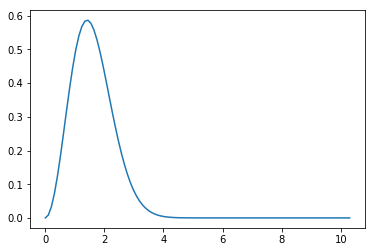

In [6]:
sigma = 0.5 # mean and standard deviation
Xs, Ys, CDFs = chiDist(3)
plt.plot(Xs,Ys)
plt.show()

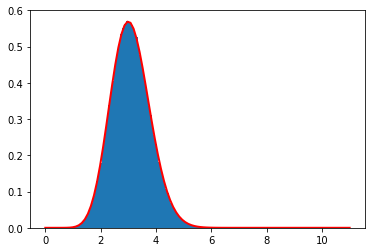

In [7]:
k = 10
A = np.sqrt(np.random.chisquare(k, 1000000))
Xs, Ys, CDFs = chiDist(k)
fig, ax1 = plt.subplots()
plt.hist(A, 100, density=True)
plt.plot(Xs, Ys, linewidth=2, color='r')
plt.show()

### cdf - cumulative distribution function

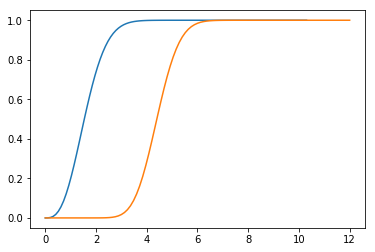

In [8]:
k = 3 # mean and standard deviation
Xs, Ys, CDFs = chiDist(k)
k2 = 20
Xs2, Ys2, CDFs2 = chiDist(k2)
plt.plot(Xs,CDFs)
plt.plot(Xs2,CDFs2)
plt.show()

### Quantile

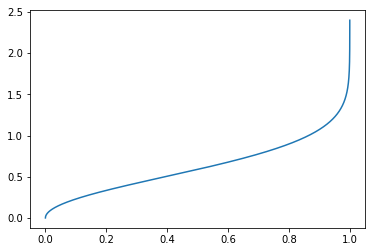

In [9]:
lambda0 = 2
Fs = np.linspace(0,1,100001)
Qs = sigma*np.sqrt(-2*np.log(1-Fs))
plt.plot(Fs,Qs)
plt.show()